In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

import warnings
warnings.filterwarnings("ignore")

In [59]:
pd.set_option('display.max_columns',None)

In [60]:
dftrain = pd.read_csv("existing_base_train.csv")

In [61]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           8124 non-null   int64  
 1   children                         8124 non-null   object 
 2   age_band                         8124 non-null   object 
 3   status                           8124 non-null   object 
 4   occupation                       8124 non-null   object 
 5   occupation_partner               8124 non-null   object 
 6   home_status                      8124 non-null   object 
 7   family_income                    8124 non-null   object 
 8   self_employed                    8124 non-null   object 
 9   self_employed_partner            8124 non-null   object 
 10  year_last_moved                  8124 non-null   int64  
 11  TVarea                           8124 non-null   object 
 12  post_code           

In [62]:
#from pandas_profiling import ProfileReport
#profile=ProfileReport(dftrain,title='Pandas Profile Report')
#profile.to_widgets()

In [63]:
dftrain.describe()

,REF_NO,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.00000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,5797.343304,1967.876908,23.251094,46.082922,27.284649,65.317939,18.826195,31.838023,25.41583,41.723628,6.057246,4.416914,19.198658,36.152749,21.442475,31.530652,89.353368,1.894141
std,3322.497568,182.563785,51.147496,79.084692,54.133537,95.762451,32.022332,45.249440,85.13015,64.416023,12.673374,9.945747,92.343126,42.474953,32.261660,39.480660,108.303538,0.307676
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-78.430000,1.000000
25%,2924.750000,1978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.282500,4.660000,8.740000,26.277500,2.000000
50%,5811.500000,1988.000000,0.000000,17.485000,0.000000,31.475000,0.010000,14.980000,0.00000,23.480000,0.000000,0.000000,0.000000,23.590000,12.820000,21.140000,65.560000,2.000000
75%,8681.500000,1994.000000,23.480000,64.990000,34.490000,92.887500,26.970000,45.922500,20.82750,59.440000,5.490000,4.490000,7.480000,49.795000,27.972500,42.392500,123.970000,2.000000
max,11518.000000,1999.000000,662.260000,2951.760000,784.820000,2930.410000,591.040000,626.240000,4905.93000,2561.270000,156.870000,162.350000,4306.420000,1231.090000,1279.100000,1771.160000,4283.560000,2.000000


In [64]:
dftrain.head(10)

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,1981,Meridian,M51 0GU,M51,26.98,29.99,312.25,299.79,88.72,108.85,175.43,134.35,8.98,55.44,7.68,Female,North West,151.55,81.79,136.02,360.37,2
1,9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,1997,Meridian,L40 2AG,L40,35.98,74.48,0.00,99.96,10.99,48.45,15.99,0.00,0.00,0.00,18.99,Female,North West,44.28,13.91,29.23,89.22,2
2,9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,1996,HTV,TA19 9PT,TA19,0.00,24.46,0.00,18.44,0.00,0.00,0.02,10.46,0.00,0.00,0.00,Female,South West,8.58,1.75,4.82,14.50,2
3,10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,1990,Scottish TV,FK2 9NG,FK2,44.99,0.00,0.00,0.00,29.99,0.00,0.00,0.00,0.00,0.00,0.00,Female,Scotland,15.00,0.00,5.00,68.98,2
4,1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,1989,Yorkshire,LS23 7DJ,LS23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.98,0.00,0.00,0.00,Female,Unknown,0.00,1.66,1.66,1.88,2
5,3309,Zero,45-50,Partner,Secretarial/Admin,Business Manager,Own Home,">=35,000",No,No,1984,Ulster,BT17 9NA,BT17,9.49,0.01,0.00,0.51,55.89,0.00,28.98,0.00,0.00,0.00,0.00,Female,Northern Ireland,13.18,4.83,14.23,33.62,2
6,6610,Zero,36-40,Partner,Secretarial/Admin,Secretarial/Admin,Own Home,"<30,000, >=27,500",Yes,No,1986,Central,B62 8TF,B62,9.99,0.00,0.00,0.00,0.00,26.96,22.99,80.42,1.00,3.99,5.49,Female,West Midlands,2.00,23.48,21.90,13.12,2
7,10621,Zero,61-65,Partner,Retired,Retired,Own Home,"<20,000, >=17,500",No,No,1998,Granada,PR8 2TY,PR8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,29.95,0.00,0.00,0.00,Male,North West,0.00,4.99,4.99,15.74,2
8,2630,1,45-50,Partner,Professional,Professional,Own Home,">=35,000",No,No,1980,Unknown,CF15 9TH,CF15,0.00,82.96,0.00,40.47,12.49,0.00,28.97,0.00,0.00,0.00,0.00,Female,Unknown,27.18,4.83,13.66,36.05,2
9,9356,3,36-40,Partner,Professional,Housewife,Own Home,"<27,500, >=25,000",Yes,No,1997,Meridian,M13 9BG,M13,0.00,0.00,0.00,0.00,0.00,0.00,15.99,0.00,24.47,0.00,0.00,Male,North West,0.00,6.74,6.74,8.60,2


In [65]:
dftrain.children.unique()

array(['2', 'Zero', '1', '3', '4+'], dtype=object)

In [66]:
dfops = dftrain.drop(["REF_NO","post_code"], axis=1)

In [67]:
dfops.columns

Index(['children', 'age_band', 'status', 'occupation', 'occupation_partner',
       'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_area',
       'Average_Credit_Card_Transaction', 'Balance_Transfer', 'Term_Deposit',
       'Life_Insurance', 'Medical_Insurance', 'Average_A/C_Balance',
       'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'gender', 'region', 'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Portfolio_Balance', 'Revenue_Grid'],
      dtype='object')

In [68]:
categoryCols = ['children', 'age_band', 'status', 'occupation', 'occupation_partner',
       'home_status', 'family_income', 'self_employed', 'self_employed_partner', 
        'TVarea', 'post_area', 'gender', 'region']

In [69]:
le = LabelEncoder()
dfle = dfops[categoryCols].apply(le.fit_transform)

In [70]:
dfops.drop(columns=categoryCols, inplace=True)

In [71]:
dfops = dfops.join(dfle)

In [72]:
dfops["Revenue_Grid"].replace(to_replace=2, value=0, inplace=True)

In [73]:
dfops

,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,post_area,gender,region
0,1981,26.98,29.99,312.25,299.79,88.72,108.85,175.43,134.35,8.98,55.44,7.68,151.55,81.79,136.02,360.37,0,1,3,1,4,4,1,11,0,0,7,1083,0,5
1,1997,35.98,74.48,0.00,99.96,10.99,48.45,15.99,0.00,0.00,0.00,18.99,44.28,13.91,29.23,89.22,0,4,6,1,6,4,1,11,0,0,7,930,0,5
2,1996,0.00,24.46,0.00,18.44,0.00,0.00,0.02,10.46,0.00,0.00,0.00,8.58,1.75,4.82,14.50,0,0,4,1,2,2,2,7,1,1,6,1686,0,9
3,1990,44.99,0.00,0.00,0.00,29.99,0.00,0.00,0.00,0.00,0.00,0.00,15.00,0.00,5.00,68.98,0,1,3,1,2,2,1,8,0,0,8,618,0,7
4,1989,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.98,0.00,0.00,0.00,0.00,1.66,1.66,1.88,0,4,8,1,1,4,1,11,0,0,13,1027,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1981,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15.23,0,2,4,1,2,1,1,6,0,0,7,922,1,5
8120,1960,0.00,0.00,9.49,0.00,0.00,2.99,0.00,46.76,0.00,0.00,0.00,1.90,8.29,8.29,68.42,0,4,9,4,5,8,1,1,0,0,3,448,0,2
8121,1987,0.00,107.42,0.00,23.42,23.99,38.95,0.00,101.37,1.00,3.72,0.00,30.97,24.17,31.46,106.06,0,0,5,2,1,8,3,1,0,0,11,211,0,6
8122,1985,0.00,59.48,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.90,0.00,0.00,-9.19,0,4,9,1,5,5,1,0,0,0,7,360,0,8


In [74]:
dfmdl = dfops.drop('year_last_moved', axis=1)

In [75]:
dfmdl.columns

Index(['Average_Credit_Card_Transaction', 'Balance_Transfer', 'Term_Deposit',
       'Life_Insurance', 'Medical_Insurance', 'Average_A/C_Balance',
       'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Portfolio_Balance', 'Revenue_Grid',
       'children', 'age_band', 'status', 'occupation', 'occupation_partner',
       'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'TVarea', 'post_area', 'gender', 'region'],
      dtype='object')

In [76]:
scaleCols = ['Average_Credit_Card_Transaction', 'Balance_Transfer', 'Term_Deposit',
       'Life_Insurance', 'Medical_Insurance', 'Average_A/C_Balance',
       'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Portfolio_Balance']

In [77]:
ss = StandardScaler()
scalardata=ss.fit(dfmdl[scaleCols])
data=scalardata.transform(dfmdl[scaleCols])
data=pd.DataFrame(data,columns=scaleCols)
dfmdl.drop(columns=scaleCols,inplace=True)
dfmdl=dfmdl.join(data)

In [78]:
dfmdl

,Revenue_Grid,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,post_area,gender,region,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
0,0,1,3,1,4,4,1,11,0,0,7,1083,0,5,0.072909,-0.203502,5.264442,2.448627,2.182793,1.702048,1.762283,1.438028,0.230636,5.130457,-0.124745,2.716998,1.870680,2.646759,2.502534
1,0,4,6,1,6,4,1,11,0,0,7,930,0,5,0.248882,0.359094,-0.504056,0.361772,-0.244725,0.367143,-0.110729,-0.647761,-0.477980,-0.444128,-0.002260,0.191354,-0.233495,-0.058276,-0.001232
2,0,0,4,1,2,2,2,7,1,1,6,1686,0,9,-0.454617,-0.273432,-0.504056,-0.489553,-0.587945,-0.703655,-0.298336,-0.485369,-0.477980,-0.444128,-0.207918,-0.649193,-0.610436,-0.676592,-0.691187
3,0,1,3,1,2,2,1,8,0,0,8,618,0,7,0.425050,-0.582739,-0.504056,-0.682125,0.348647,-0.703655,-0.298571,-0.647761,-0.477980,-0.444128,-0.207918,-0.498036,-0.664684,-0.672032,-0.188125
4,0,4,8,1,1,4,1,11,0,0,13,1027,0,10,-0.454617,-0.582739,-0.504056,-0.682125,-0.587945,-0.703655,-0.298571,-0.492821,-0.477980,-0.444128,-0.207918,-0.851207,-0.613226,-0.756636,-0.807718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,2,4,1,2,1,1,6,0,0,7,922,1,5,-0.454617,-0.582739,-0.504056,-0.682125,-0.587945,-0.703655,-0.298571,-0.647761,-0.477980,-0.444128,-0.207918,-0.851207,-0.664684,-0.798685,-0.684446
8120,0,4,9,4,5,8,1,1,0,0,3,448,0,2,-0.454617,-0.582739,-0.328738,-0.682125,-0.587945,-0.637573,-0.298571,0.078190,-0.477980,-0.444128,-0.207918,-0.806472,-0.407706,-0.588695,-0.193296
8121,0,0,5,2,1,8,3,1,0,0,11,211,0,6,-0.454617,0.775635,-0.504056,-0.437546,0.161266,0.157182,-0.298571,0.926013,-0.399070,-0.070076,-0.207918,-0.122026,0.084549,-0.001790,0.154267
8122,0,4,9,1,5,5,1,0,0,0,7,360,0,8,-0.454617,0.169412,-0.504056,-0.682125,-0.587945,-0.703655,-0.298571,-0.647761,-0.477980,-0.444128,-0.207918,-0.571025,-0.664684,-0.798685,-0.909937


In [79]:
X = dfmdl.drop("Revenue_Grid", axis=1)
y = dfmdl.Revenue_Grid

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [81]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [82]:
y_pred_test = lr.predict(X_test)

In [83]:
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred_test)))

[[1411   25]
 [  85  104]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1436
           1       0.81      0.55      0.65       189

    accuracy                           0.93      1625
   macro avg       0.87      0.77      0.81      1625
weighted avg       0.93      0.93      0.93      1625

Accuracy Score 0.9323076923076923


In [84]:
dfops

,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,post_area,gender,region
0,1981,26.98,29.99,312.25,299.79,88.72,108.85,175.43,134.35,8.98,55.44,7.68,151.55,81.79,136.02,360.37,0,1,3,1,4,4,1,11,0,0,7,1083,0,5
1,1997,35.98,74.48,0.00,99.96,10.99,48.45,15.99,0.00,0.00,0.00,18.99,44.28,13.91,29.23,89.22,0,4,6,1,6,4,1,11,0,0,7,930,0,5
2,1996,0.00,24.46,0.00,18.44,0.00,0.00,0.02,10.46,0.00,0.00,0.00,8.58,1.75,4.82,14.50,0,0,4,1,2,2,2,7,1,1,6,1686,0,9
3,1990,44.99,0.00,0.00,0.00,29.99,0.00,0.00,0.00,0.00,0.00,0.00,15.00,0.00,5.00,68.98,0,1,3,1,2,2,1,8,0,0,8,618,0,7
4,1989,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.98,0.00,0.00,0.00,0.00,1.66,1.66,1.88,0,4,8,1,1,4,1,11,0,0,13,1027,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1981,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15.23,0,2,4,1,2,1,1,6,0,0,7,922,1,5
8120,1960,0.00,0.00,9.49,0.00,0.00,2.99,0.00,46.76,0.00,0.00,0.00,1.90,8.29,8.29,68.42,0,4,9,4,5,8,1,1,0,0,3,448,0,2
8121,1987,0.00,107.42,0.00,23.42,23.99,38.95,0.00,101.37,1.00,3.72,0.00,30.97,24.17,31.46,106.06,0,0,5,2,1,8,3,1,0,0,11,211,0,6
8122,1985,0.00,59.48,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.90,0.00,0.00,-9.19,0,4,9,1,5,5,1,0,0,0,7,360,0,8


In [85]:
dfops.columns

Index(['year_last_moved', 'Average_Credit_Card_Transaction',
       'Balance_Transfer', 'Term_Deposit', 'Life_Insurance',
       'Medical_Insurance', 'Average_A/C_Balance', 'Personal_Loan',
       'Investment_in_Mutual_Fund', 'Investment_Tax_Saving_Bond', 'Home_Loan',
       'Online_Purchase_Amount', 'Investment_in_Commudity',
       'Investment_in_Equity', 'Investment_in_Derivative', 'Portfolio_Balance',
       'Revenue_Grid', 'children', 'age_band', 'status', 'occupation',
       'occupation_partner', 'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'TVarea', 'post_area', 'gender', 'region'],
      dtype='object')

In [86]:
dfops["final_balance"] = (dfops['Term_Deposit'] 
                          + dfops['Average_A/C_Balance']
                          + dfops['Investment_in_Mutual_Fund']
                          + dfops['Investment_Tax_Saving_Bond']
                          + dfops['Investment_in_Commudity']                                                        
                          + dfops['Investment_in_Equity']
                          + dfops['Investment_in_Derivative']             
                          + dfops['Portfolio_Balance']) - (dfops['Average_Credit_Card_Transaction'] 
                          + dfops['Life_Insurance'] 
                          + dfops['Balance_Transfer'] 
                          + dfops['Medical_Insurance'] 
                          + dfops['Personal_Loan'] 
                          + dfops['Home_Loan'] 
                          + dfops['Online_Purchase_Amount'] 
                         )
                          

In [87]:
dfops.final_balance.describe().T

count    8124.000000
mean       82.873237
std       159.858901
min     -2838.190000
25%        -5.310000
50%        52.230000
75%       142.122500
max      1766.720000
Name: final_balance, dtype: float64

<AxesSubplot:ylabel='Frequency'>

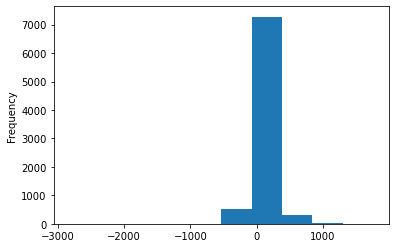

In [88]:
dfops.final_balance.plot(kind="hist")

In [89]:
dfops.skew()

year_last_moved                   -10.639671
Average_Credit_Card_Transaction     3.761152
Balance_Transfer                    8.173734
Term_Deposit                        4.174163
Life_Insurance                      5.509379
Medical_Insurance                   3.361940
Average_A/C_Balance                 2.689985
Personal_Loan                      26.159596
Investment_in_Mutual_Fund           9.667247
Investment_Tax_Saving_Bond          3.191713
Home_Loan                           3.977657
Online_Purchase_Amount             21.763954
Investment_in_Commudity             4.816122
Investment_in_Equity               11.524906
Investment_in_Derivative           12.462312
Portfolio_Balance                   8.895472
Revenue_Grid                        2.562680
children                           -0.649165
age_band                            0.089550
status                              2.114991
occupation                         -0.329337
occupation_partner                 -0.049537
home_statu

In [90]:
dfmdl = dfops.drop(columns=['Average_Credit_Card_Transaction',
       'Balance_Transfer', 'Term_Deposit', 'Life_Insurance',
       'Medical_Insurance', 'Average_A/C_Balance', 'Personal_Loan',
       'Investment_in_Mutual_Fund', 'Investment_Tax_Saving_Bond', 'Home_Loan',
       'Online_Purchase_Amount', 'Investment_in_Commudity',
       'Investment_in_Equity', 'Investment_in_Derivative', 'Portfolio_Balance'])

In [91]:
dfmdl

,year_last_moved,Revenue_Grid,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,post_area,gender,region,final_balance
0,1981,0,1,3,1,4,4,1,11,0,0,7,1083,0,5,610.13
1,1997,0,4,6,1,6,4,1,11,0,0,7,930,0,5,-31.30
2,1996,0,0,4,1,2,2,2,7,1,1,6,1686,0,9,-2.81
3,1990,0,1,3,1,2,2,1,8,0,0,8,618,0,7,14.00
4,1989,0,4,8,1,1,4,1,11,0,0,13,1027,0,10,15.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1981,0,2,4,1,2,1,1,6,0,0,7,922,1,5,15.23
8120,1960,0,4,9,4,5,8,1,1,0,0,3,448,0,2,146.14
8121,1987,0,0,5,2,1,8,3,1,0,0,11,211,0,6,175.43
8122,1985,0,4,9,1,5,5,1,0,0,0,7,360,0,8,-56.77


In [92]:
X = dfmdl.drop("Revenue_Grid", axis=1)
y = dfmdl.Revenue_Grid

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [94]:
lr1 = LogisticRegression()
lr1.fit(X_train, y_train)

LogisticRegression()

In [95]:
y_pred_test = lr1.predict(X_test)

In [96]:
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred_test)))

[[1436    0]
 [ 187    2]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1436
           1       1.00      0.01      0.02       189

    accuracy                           0.88      1625
   macro avg       0.94      0.51      0.48      1625
weighted avg       0.90      0.88      0.83      1625

Accuracy Score 0.8849230769230769


##### Testing

In [97]:
dftest = pd.read_csv("existing_base_test.csv")

In [98]:
dftest.children.unique()

array(['Zero', '1', '2', '3', '4+'], dtype=object)

In [99]:
dftestops = dftest.drop(["REF_NO","post_code"], axis=1)

In [100]:
#le = LabelEncoder()
dftestle = dftestops[categoryCols].apply(le.fit_transform)

In [101]:
dftestops.drop(columns=categoryCols, inplace=True)

In [102]:
dftestops = dftestops.join(dftestle)

In [103]:
dfTestMdl = dftestops.drop('year_last_moved', axis=1)

In [104]:
#ss = StandardScaler()
scalardata=ss.fit(dfTestMdl[scaleCols])
data=scalardata.transform(dfTestMdl[scaleCols])
data=pd.DataFrame(data,columns=scaleCols)
dfTestMdl.drop(columns=scaleCols,inplace=True)
dfTestMdl=dfTestMdl.join(data)

In [105]:
dfmdl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year_last_moved        8124 non-null   int64  
 1   Revenue_Grid           8124 non-null   int64  
 2   children               8124 non-null   int32  
 3   age_band               8124 non-null   int32  
 4   status                 8124 non-null   int32  
 5   occupation             8124 non-null   int32  
 6   occupation_partner     8124 non-null   int32  
 7   home_status            8124 non-null   int32  
 8   family_income          8124 non-null   int32  
 9   self_employed          8124 non-null   int32  
 10  self_employed_partner  8124 non-null   int32  
 11  TVarea                 8124 non-null   int32  
 12  post_area              8124 non-null   int32  
 13  gender                 8124 non-null   int32  
 14  region                 8124 non-null   int32  
 15  fina

In [106]:
dfTestMdl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   children                         2031 non-null   int32  
 1   age_band                         2031 non-null   int32  
 2   status                           2031 non-null   int32  
 3   occupation                       2031 non-null   int32  
 4   occupation_partner               2031 non-null   int32  
 5   home_status                      2031 non-null   int32  
 6   family_income                    2031 non-null   int32  
 7   self_employed                    2031 non-null   int32  
 8   self_employed_partner            2031 non-null   int32  
 9   TVarea                           2031 non-null   int32  
 10  post_area                        2031 non-null   int32  
 11  gender                           2031 non-null   int32  
 12  region              

In [107]:
y_pred_test = lr.predict(dfTestMdl)

In [108]:
y_pred_test

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [109]:
df=pd.DataFrame(y_pred_test, columns=['Revenue_Grid'])
df.replace(to_replace=0, value=2, inplace=True)

In [111]:
df['Revenue_Grid'].value_counts()

2    1850
1     181
Name: Revenue_Grid, dtype: int64

In [112]:
df.to_csv('existing_base_test_prediction.csv')